## House Sales in King County, USA
**Predict House Price using Regression**<br>
https://www.kaggle.com/mht570/housing-price-prediciton/data

**About this Dataset:**<br>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.It's a great dataset for evaluating simple regression models.

In [1]:
# ! pip install BeautifulSoup4
# %pwd     

In [27]:
#  'Scikit learn' is the machine learning library in Python. It comes from the Anaconda install
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from scipy import stats 

# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation
from scipy.stats.stats import pearsonr
# Calculate a Spearman rank-order correlation coefficient and the p-value to test for non-correlation. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 
from scipy.stats import spearmanr

# Ordinary least squares linear regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 

# Split arrays or matrices into randome train and test subsets
from sklearn.model_selection import train_test_split

# %matplotlib inline: let live the data visualization within this Jupyter Notebook (not via external app)
%matplotlib inline                    
rcParams['figure.figsize'] = 9, 6     # globally set the figure size at (5 inches high, 4 inches wide)   
sb.set_style('whitegrid')             # globally set up Seaborn style sheet to be 'whitegrid' thruout the script

### Create Column Indexes Using Dataframe from Dictionary

In [3]:
column_idx = pd.DataFrame({'Column_Title': ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot',
                                            'floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
                                            'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],
                           'Description': ['A notation for a house','Date house was sold','Prediction target',
                                          '# of bedrooms','# of bathrooms','square footage of the home',
                                          'square footage of the lot','Total floors (levels) in house',
                                          'House which has a view to a waterfront','Has been viewed',
                                          'How good the condition is ( Overall )','overall grade given to the housing unit, based on King County grading system',
                                          'square footage of house apart from basement','square footage of the basement',
                                          'Built Year','Year when house was renovated','zip','Latitude coordinate',
                                          'Longitude coordinate','Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area',
                                          'lotSize area in 2015(implies-- some renovations)']})
column_idx

,Column_Title,Description
0,id,A notation for a house
1,date,Date house was sold
2,price,Prediction target
3,bedrooms,# of bedrooms
4,bathrooms,# of bathrooms
5,sqft_living,square footage of the home
6,sqft_lot,square footage of the lot
7,floors,Total floors (levels) in house
8,waterfront,House which has a view to a waterfront
9,view,Has been viewed


### Read the Raw Dataset in .csv

In [4]:
df = pd.read_csv('kc_house_data.csv')
print('df: row x column=>', df.shape)
print('waterfront unique_values: ',set(df['waterfront'].values))
df.head()

df: row x column=> (21613, 21)
waterfront unique_values:  {0, 1}


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### Scatterplot: Directly Proportional Relationship between Price and Sqrt_Living

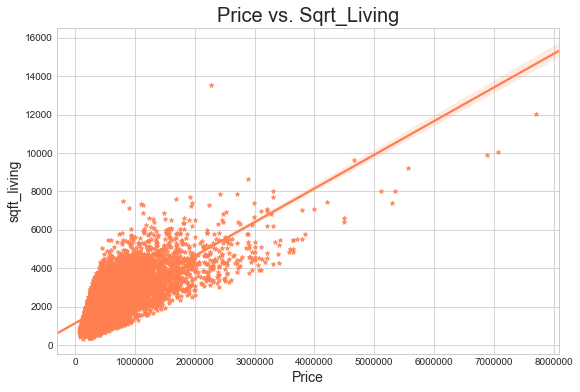

In [6]:
# plt.figure(figsize=(7, 7))
# plt.scatter(x = df['price'],y = df['sqft_living'])
# plt.xlabel('price')
# plt.ylabel('sqft_living')
# plt.show()

# scatter_kws={"s":20}: scatter_kws={"marker": "D", # Set marker style, 
#                                         "s": 100}) # S marker size
                        
sb.regplot(x='price', y='sqft_living', data=df, scatter=True, scatter_kws={"s":20}, marker='*',color='coral')
plt.title('Price vs. Sqrt_Living', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('sqft_living', fontsize=14);
# plt.legend()



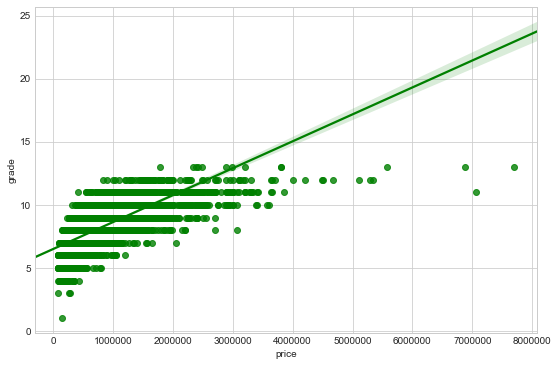

In [7]:
sb.regplot(x='price', y='grade', data=df, scatter=True, color='green')

### Select Features (x) and Target (y) Variables to plot .pairplot()

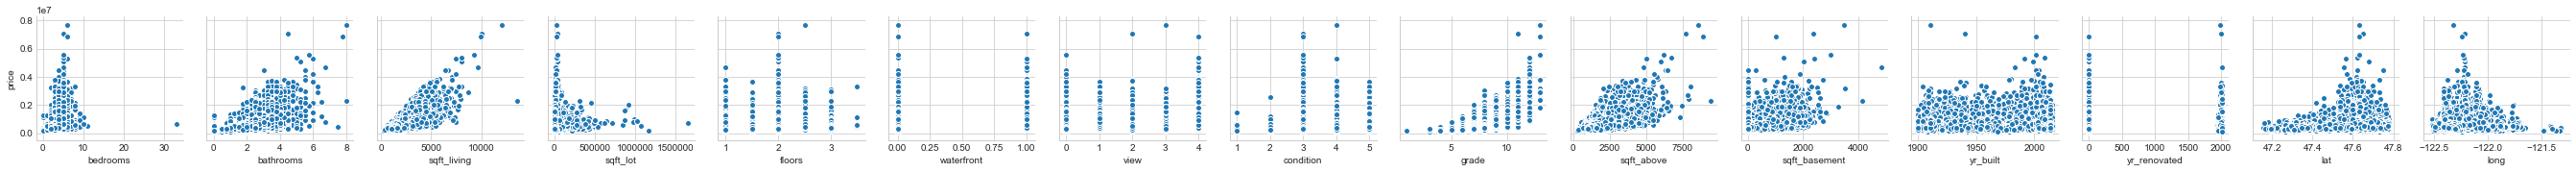

In [8]:
features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 
            'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long']

x_features = df[features]
y_target = df['price']

sb.pairplot(df, y_vars= 'price', x_vars = features)

### Determine The Size of Train and Test Set

In [24]:
# Split arrays or matrices into random train (67% = 2/3) and test (33% = 1/3) subsets
#  As a rule of thumb, 2/3 of dataset = training set (use it to train your model), 1/3 = test set (see how well the model performs)

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.33, random_state=0)
print('Train x-y set:', x_train.shape, y_train.shape)
print('Test x-y set:', x_test.shape, y_test.shape)

Train x-y set: (14480, 15) (14480,)
Test x-y set: (7133, 15) (7133,)


### Training your model by using Linear Regression() function

In [25]:
# clf (= classifier) estimator instance is 1st fitted to the model; that is, it must learn from the model. This is done by passing our training set to the fit method.  
clf = LinearRegression()   # Use linear regression as a classifier

clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### See My Model Accuracy using Score() function

In [26]:
accuracy = clf.score(x_test, y_test)
print('Accuracy: {}%'.format(int(accuracy*100)))

Accuracy: 68%


### Training your model by using Ridge() function

In [34]:
clf1 = Ridge(alpha=0.0001)
clf1.fit(x_train, y_train)

accuracy1 = clf1.score(x_test, y_test)
print('Accuracy: {}%'.format(int(accuracy1*100)))

Accuracy: 68%


/Users/heesukjang/miniconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.663744330388457e-18 / 1.1102230246251565e-16
  RuntimeWarning)


In [9]:
# ! sudo pip3 install --upgrade pip setuptools wheel
# ! pip install xgboost

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# from xgboost import XGBRegressor
# clf = svm.SVC(kernel='linear', C=1)
# scores = cross_val_score(clf, x_features, y_target, cv=5)   # cv = cross-validation

### Generating a scatter plot matrix

In [ ]:
sb.pairplot(df)

In [ ]:
# house_df stores all the rows from column indexes 2,3,4,5,20
# house_df = df[['price','bedrooms','bathrooms','sqft_living','yr_built']]    # slice all the rows from these column names
house_df = df.loc[:,['price','bedrooms','bathrooms','sqft_living']]

# house_waterfront = df.ix[:,8].values
# house_waterfront = df.iloc[:,8].values    # = target variable
target_waterfront = df['waterfront']
waterfront_options = [0, 1]          # 0: doesn not have waterfront view, 1: have waterfront view 

# create a new column, 'group' = categorical variable
house_df['group_waterfront'] = pd.Series(target_waterfront, dtype='category')
# pass the name of df we want plotted and hue = 'group': tells Seaborn to pick the colors for the points based on the values in the 'group' column, palette = 'hls': pre-built color palettes
# red dots: no waterfront view, blue dots: yes waterfront view
sb.pairplot(house_df, hue='group_waterfront', palette='hls')    # palette='spring' or 'husl'

# http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
# .loc: for "label(by names)" index, .iloc: for "Positionally (by integer index order)" index, .ix() is deprecated

### Building Boxplots

In [ ]:
df.boxplot(column='price', by='waterfront')
df.boxplot(column='bedrooms', by='condition')

In [ ]:
sb.boxplot(x='view', y='grade', data=df, palette='hls')

In [ ]:
house_feat = df[['price','sqft_living','view']]
house_feat.head()

### Transforming variables to categorical data type using .groupby() and describe()

In [ ]:
view_group = house_feat.groupby('view')
view_group.describe()

In [ ]:
# pd.Series(x_variable, dtype)
df['group'] = pd.Series(df.view, dtype='category')
df['group'].dtypes
df['group'].value_counts()

### Describing categorical data with crosstabs

In [ ]:
pd.crosstab(df['view'], df['waterfront'])

### Parametric Correlation Analysis
** Correlation does NOT imply causation: ** i.e. The The bigger the grocery stores the more obesity there tends to be. Of course, the size of the store doesn't cause the obesity, but they are correlated.<br>
<br>
** Pearson Correlation Coefficient: **
<font color=blue> R = 1 -> Strong positive relationship</font><br>
<font color=blue> R = 0 -> Not linearly correlated (Not correlated)</font><br>
<font color=blue> R = -1 -> Strong negative relationship</font><br>

** Pearson Correlation: Assumptions**<br>
<font color=blue>Your data is normally distributed</font><br>
<font color=blue>You have continuous numeric variables (Not multinomial or binomial variables)</font><br>
<font color=blue>Your variables are linearly related. </font>

In [ ]:
x = df[['price','bedrooms','sqft_living','grade']]
sb.pairplot(x, palette='hls')

### Using Scipy to calculate the Pearson correlation coefficient
##### You can use the Pearson R correlation coefficient to establish whether or not your variable pairs meet the requirements of more advanced models.

In [ ]:
# call pearsonr() function to calculate correlation coefficient
pearsonr_coefficient1, p_value = pearsonr(df['price'], df['yr_built'])
pearsonr_coefficient2, p_value = pearsonr(df['price'], df['zipcode'])
pearsonr_coefficient3, p_value = pearsonr(df['price'], df['sqft_living'])
print('PearsonR Correlation coefficient %.3f' %(pearsonr_coefficient1))
print('PearsonR Correlation coefficient %.3f' %(pearsonr_coefficient2))
print('PearsonR Correlation coefficient %.3f' %(pearsonr_coefficient3))

** Outcome:** House price and Square footage living have more than moderate degree of linear correlation while price yr_built doesnot seem to have linearly related and price zipcode have inversely linear relationship.

### Using Pandas to calculate the Pearson correlation coefficient

In [ ]:
corr = x.corr()
corr

### Using Seaborn to visualize the Pearson correlation coefficient

In [ ]:
# annot: annotation (add corr value in each heatmap box), fmt: string formatting code with 2 decimal points, cmap: differnt color map (if you want default color map, remove this feature)
sb.heatmap(corr, robust=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f", cmap='YlGnBu',linewidths=.7)

### Non-Parametric Correlation Analysis
: To find correlation between categorical, non-linearly related, non-normally distributed variables.<br>
<font color=blue> R = 1 -> Strong positive relationship</font><br>
<font color=blue> R = 0 -> Not linearly correlated (Not correlated)</font><br>
<font color=blue> R = -1 -> Strong negative relationship</font><br>
<br>
** 1.  Spearman's rank correlation: **<br>
The Spearman's rank method converts ordinal variables into variable pairs and then calculates an R correlation co-efficient by which to rank the variable pairs according to the extent of their correlation.<br>
**Assumptions:**<br>
<font color=blue>Your variables are ordinal (our variables are ordinal).</font><br>
<font color=blue>Your variables are related non-linearly.</font><br>
<font color=blue>Your data is non-normally distributed.</font>
<br>
<br>
** 2.  Chi-square tables to test for independence between variables.: **<br>
If you get a **p-value < .05** then you're going to conclude your variables are **correlated** <u>(reject null hypothesis)</u>. If you get a value of **p > .05** you'll conclude that your variables are **independent** of one another <u>(accept null hypothesis)</u>. The null hypothesis of this test is that the variables are independent of one another. As far as the assumptions of the chi-square test, you just want to make sure your variables are categoric or numeric.<br>
**When to use Chi-Square Tables:**<br>
<font color=blue>Your variables are categoric or numeric.</font><br>
<font color=blue>You have binned the numeric variables.</font>

In [ ]:
# the following variables are numeric-ordinal (ranking), non-linearly, and non-normally distrubted
x = df[['view','waterfront','condition', 'bedrooms']]
sb.pairplot(x)

In [ ]:
spearmanr_coefficient, p_value=spearmanr(df['view'],df['waterfront'])
print('Spearman Rank Correlation coefficient (r-value) %.3f' %(spearmanr_coefficient))

In [ ]:
spearmanr_coefficient, p_value=spearmanr(df['view'],df['bedrooms'])
print('Spearman Rank Correlation coefficient (r-value) %.3f' %(spearmanr_coefficient))

**Outcome: ** both of the r-values (=degree to which variables are correlated) are close to zero thus the variables, 'view' and 'waterfront' as well as 'view' and 'bedrooms'are not correlated (accept null hypothesis) => if the r-value is close to 1 or -1, then we know there is a strong degree fo correlation between variables in the pair.

### Chi-Square Test of Independence of variables in a contingency table 
##### : Establish correlation between Categorical Variables

In [ ]:
#  computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed.
from scipy.stats import chi2_contingency

table = pd.crosstab(df['view'],df['waterfront'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square Statistic %.3f | p-value %.3f' %(chi2,p))

# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
table = pd.crosstab(df['view'],df['condition'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square Statistic %.3f | p-value %.3f' %(chi2,p))

In [ ]:
table = pd.crosstab(df['view'],df['bedrooms'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square Statistic %.3f | p-value %.3f' %(chi2,p))

**Outcome: ** all of the p-values are zero (less than 0.5) thus we must reject null hypothesis and conclude that the variables are correlated. => "Null Hypothesis: Your variables are NOT correlated (independent)"